# Clustering Using PCA - Wine

### Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)


#### Data Description:

Chemical composition of wine sample
    
    Features:
    1.) Alcohol, 2.) Malic, 3.) Ash, 4.) Alcalinity,5.) Magnesium, 6.) Phenols, 7.) Flavanoids, 8.)Nonflavanoids,
    9.)Proanthocyanins, 10.) Color, 11.) Hue, 12.) Dilution, 13.) Proline

### Project Background

Classifying different types of wine samples into different types of wines based on their chemical composition.

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn
from sklearn.neighbors import NearestNeighbors  
from sklearn.cluster import DBSCAN

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# wine data
wine_data = pd.read_csv("wine.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
wine_data.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
# Shape of the data
wine_data.shape

(178, 14)

In [5]:
# Summary of the data
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# Check the data types
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#### Modifying the dataset

In [7]:
wine_data = wine_data.drop(['Type'],axis=1)
wine_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine_data.shape

(178, 13)

### Step-2.2 : Handling missing values

In [9]:
# Check for Null values
wine_data.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
# Check for duplicate values
wine_data[wine_data.duplicated()].shape

(0, 13)

In [11]:
wine_data[wine_data.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


#### There are no missing values.

### Step-2.3 : Exploring data using Visualisation

#### Histogram

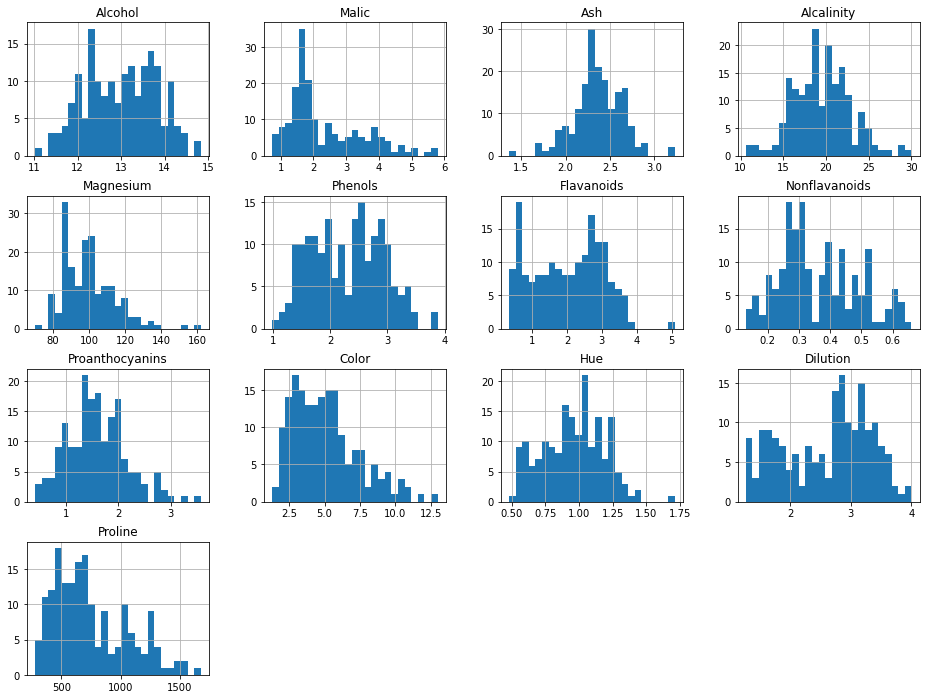

In [12]:
wine_data.hist(figsize=(16,12),bins=25)
plt.show()

#### Boxplot

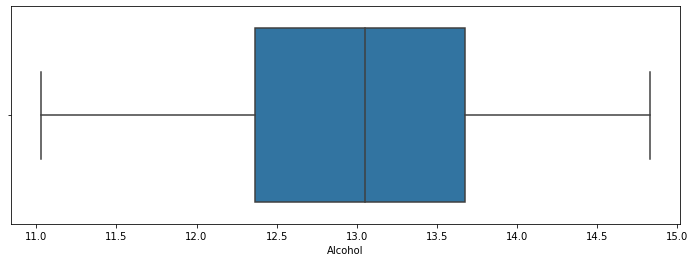

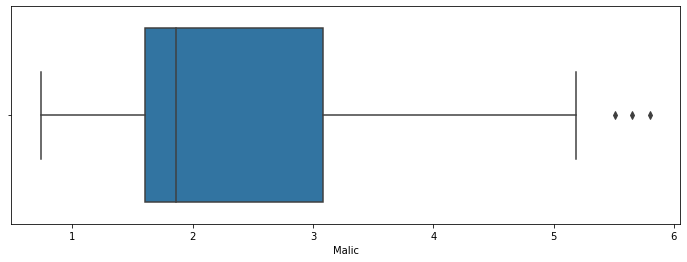

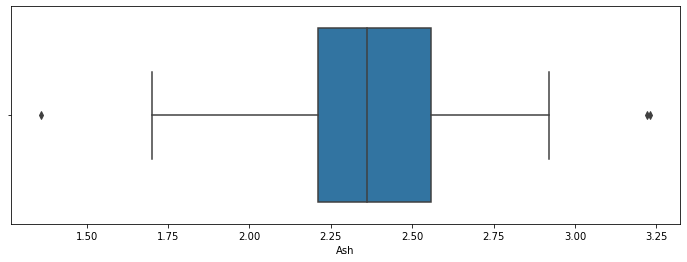

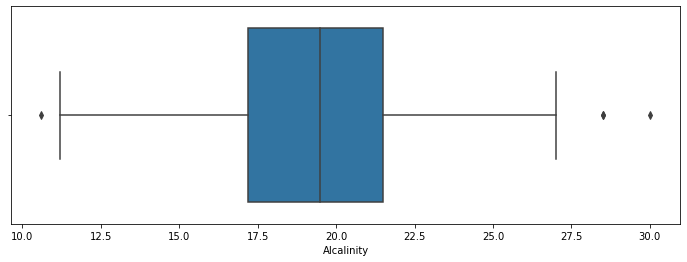

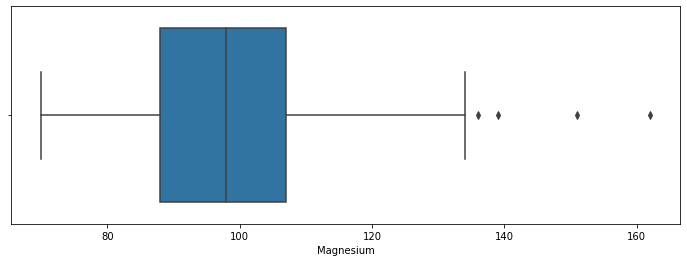

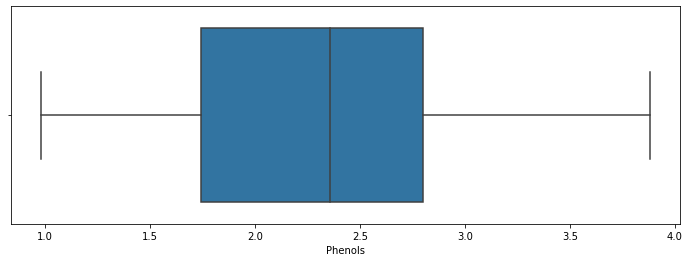

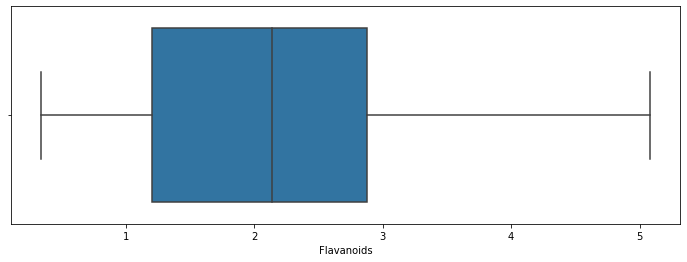

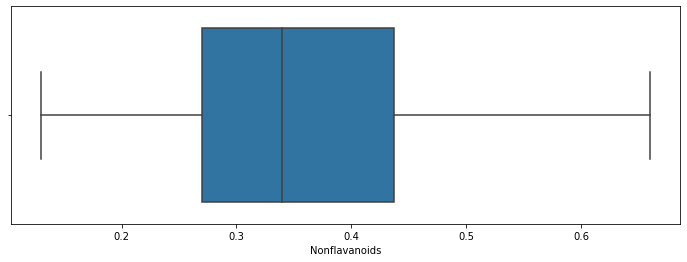

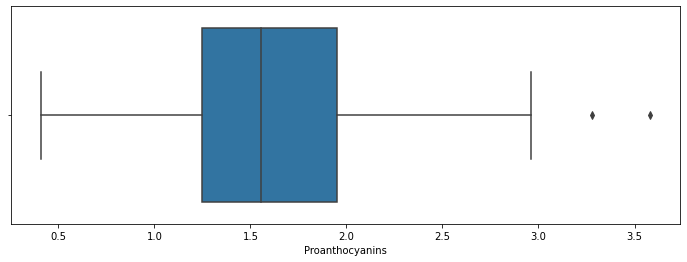

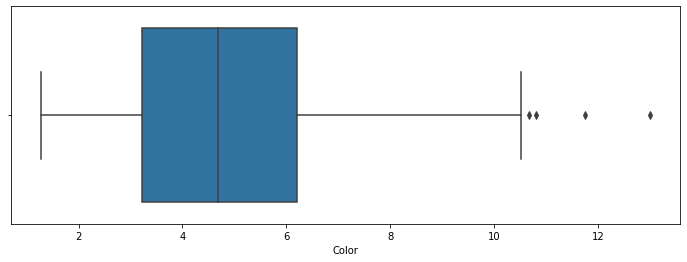

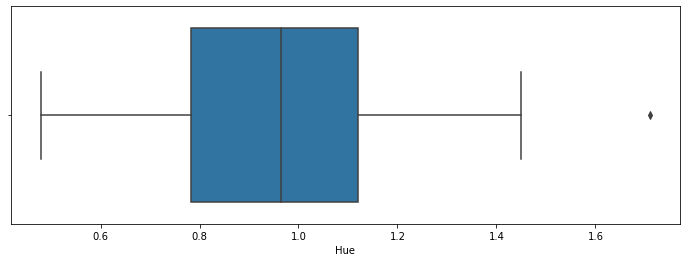

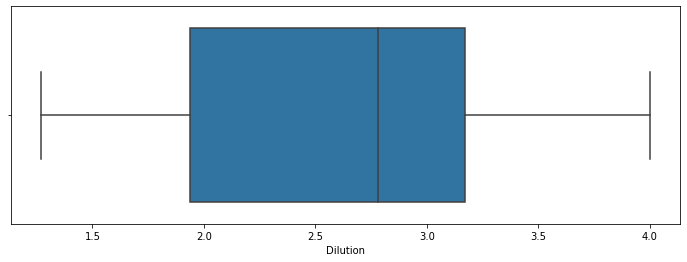

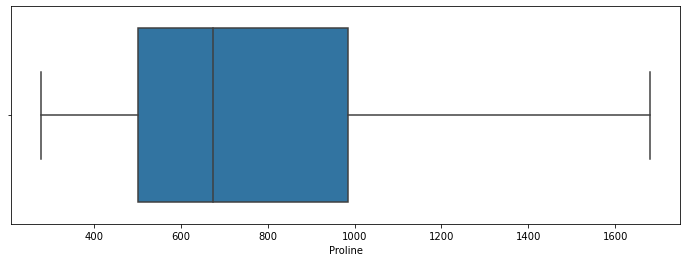

In [13]:
for feature in wine_data.columns:
    plt.figure(figsize=(12,4))
    sb.boxplot(wine_data[feature])

#### Comparing features using Boxplots

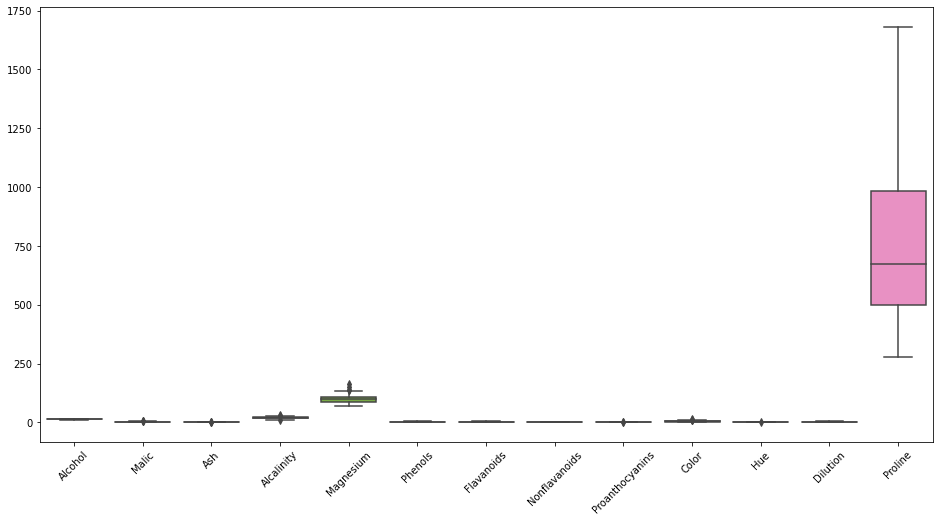

In [14]:
plt.figure(figsize=(16,8))
sb.boxplot(data=wine_data)
plt.xticks(rotation=45)
plt.show()

#### Correlation and Heat map

In [15]:
# Checking for Correlation between variables
wine_data.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


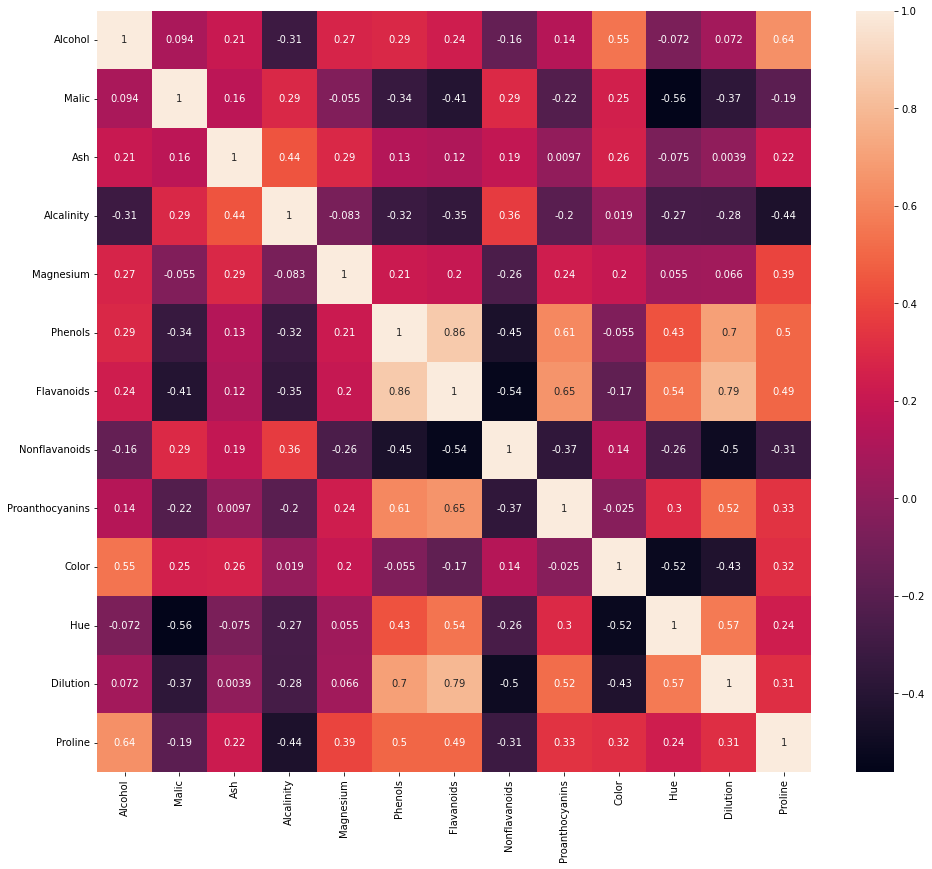

In [16]:
plt.figure(figsize=(16,14))
sb.heatmap(wine_data.corr(),annot=True)
plt.show()

#### Observation
+ We can see that Phenols and Flavanoids have strong correlation.
+ Flavanoids and Phenols are strongly correlated to Dilution.
+ Proanthocyanins is strongly correlated to Flavanoids.
+ Alcohol is strongly correlated to Proline.

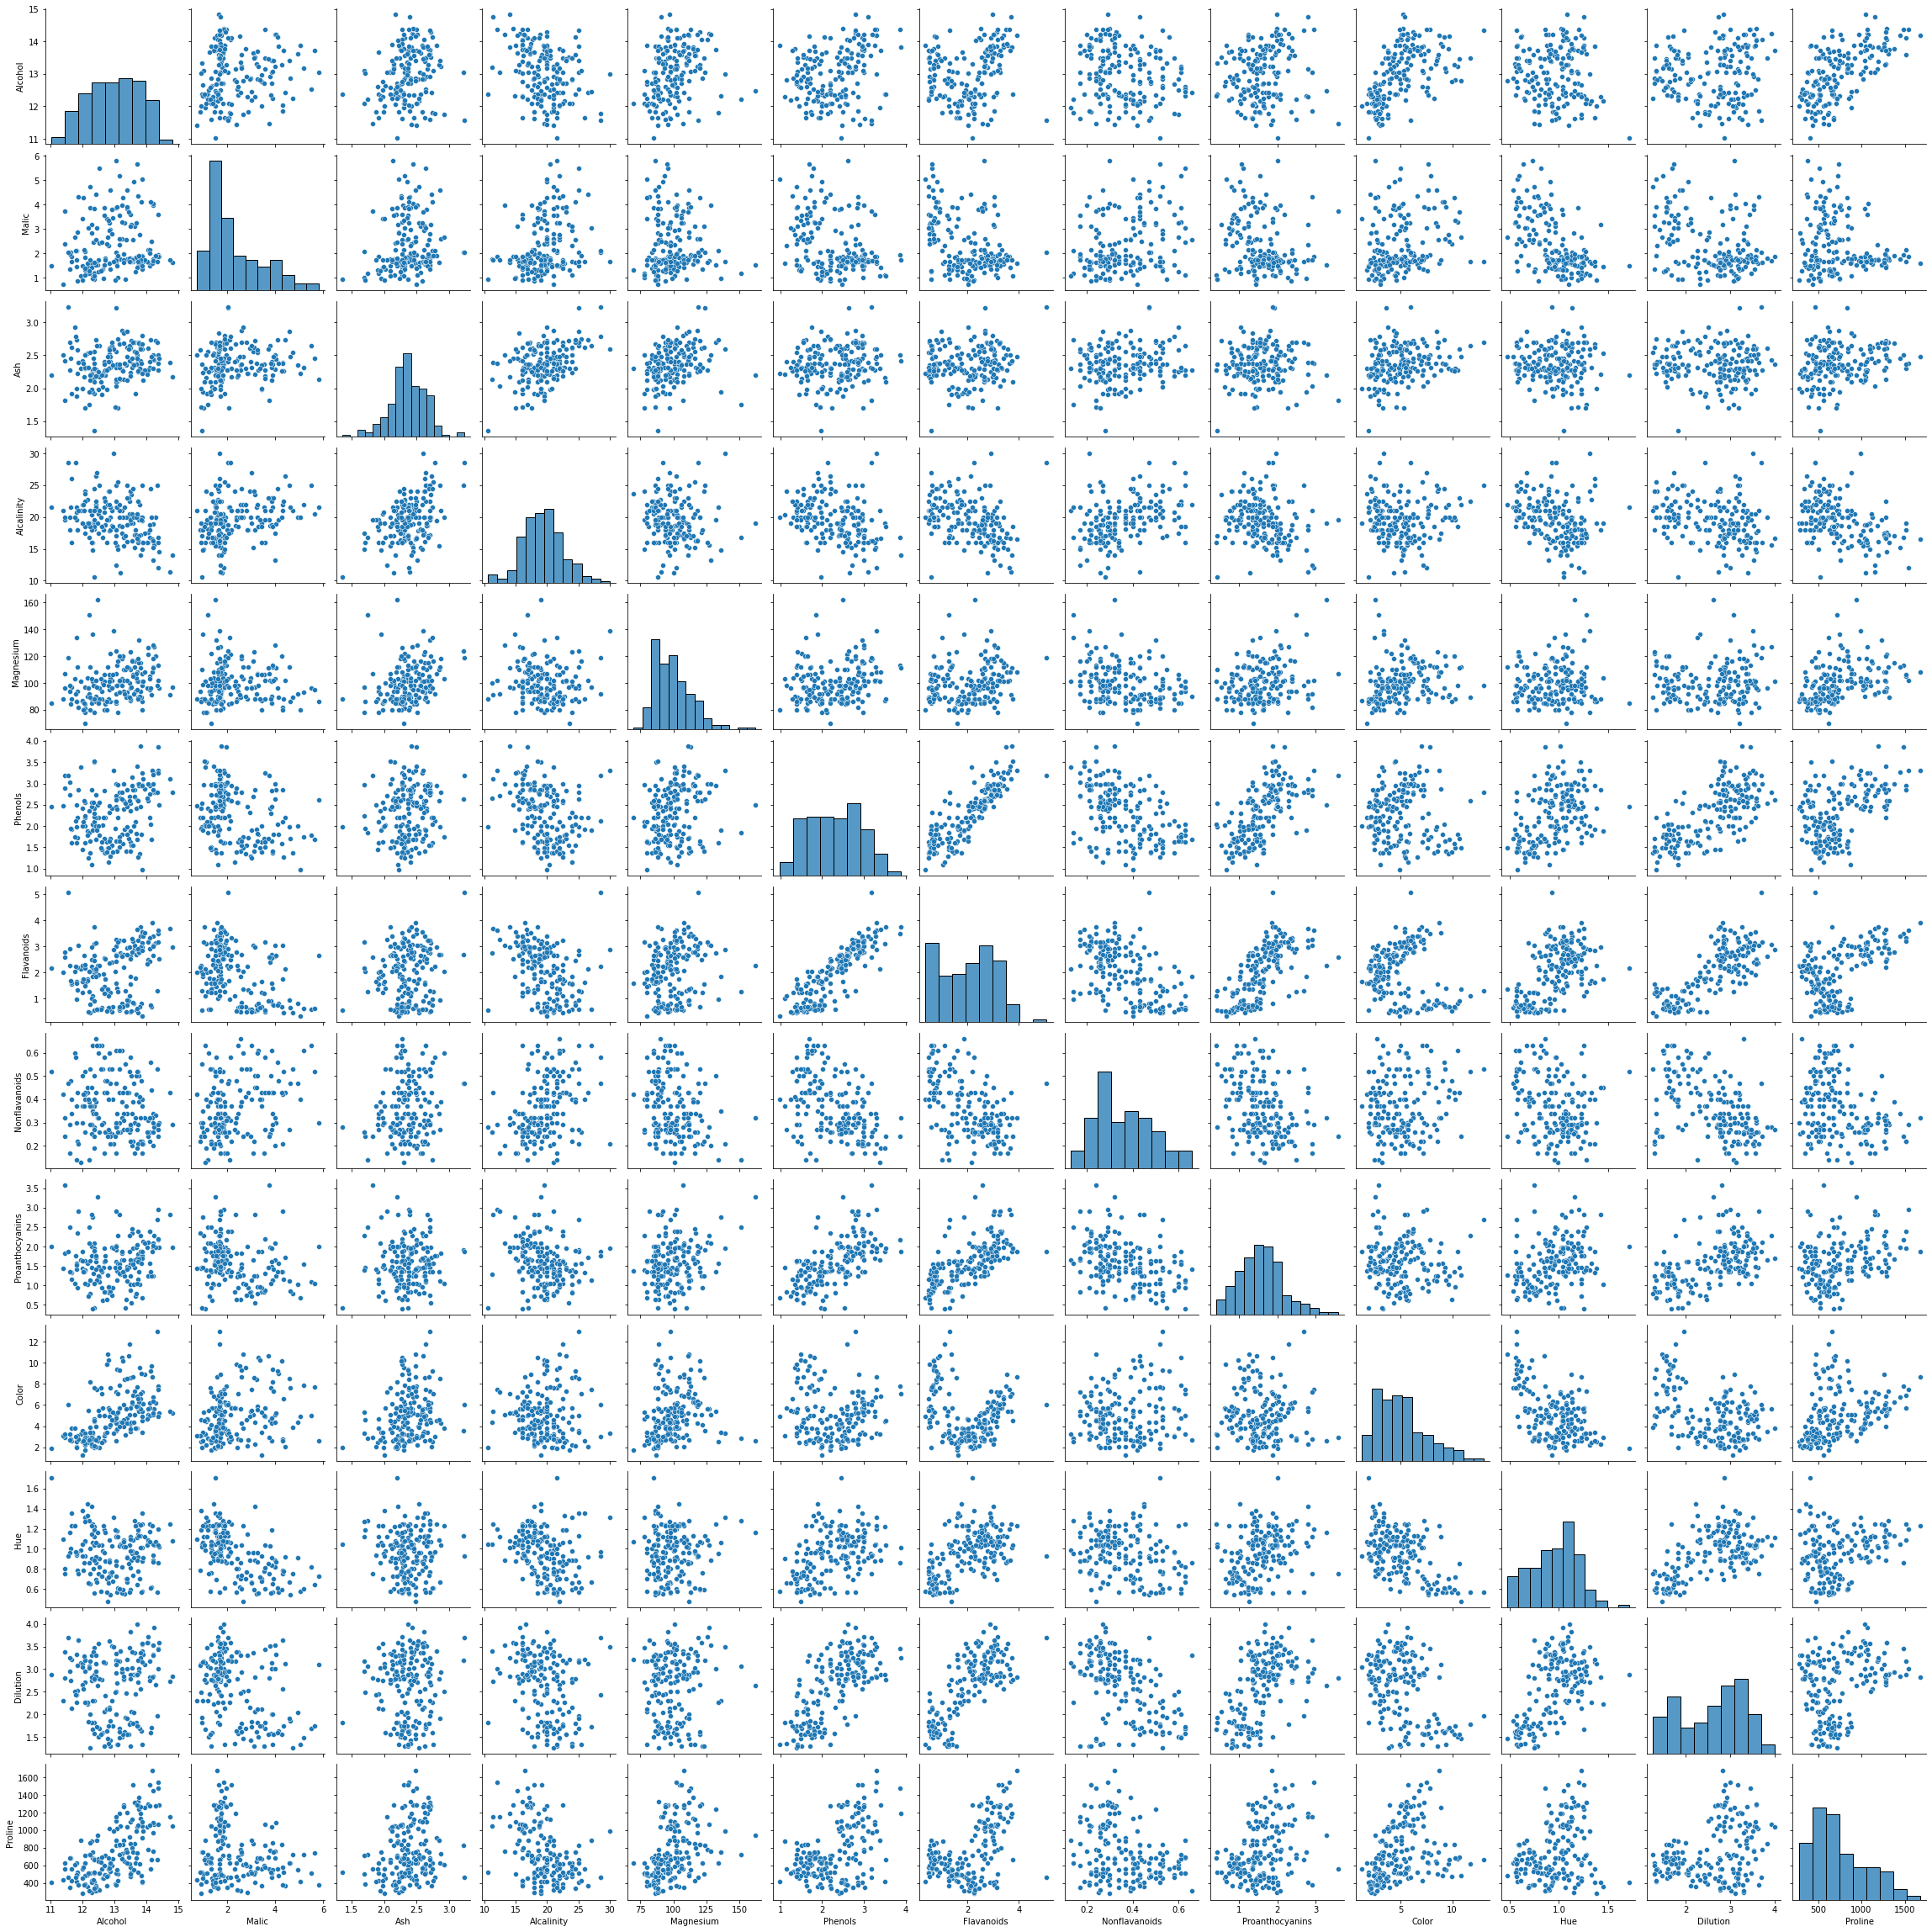

In [17]:
sb.pairplot(data=wine_data)

### Step-3 : Pre-Processing the Data

### Step-3.1 : Standardising the data

In [18]:
standard_scaler = StandardScaler()
wine_data_std = standard_scaler.fit_transform(wine_data)
wine_data_std.shape

(178, 13)

### Step-3.2 : Normalising the data

In [19]:
min_max = MinMaxScaler()
wine_data_norm = min_max.fit_transform(wine_data)
wine_data_norm.shape

(178, 13)

#### However both give almost same result. So adopt Standardised data.

### Step-4 : Applying PCA-Principal Component Analysis

In [20]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_data_std)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [21]:
#loadings or weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [22]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [23]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

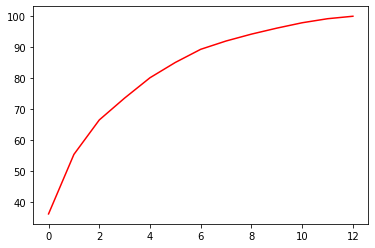

In [24]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [25]:
wine_data_pca = pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])
wine_data_pca

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

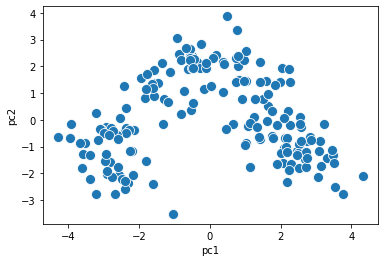

In [26]:
sb.scatterplot(data=wine_data_pca,x='pc1',y='pc2',s = 100)

### Step-5 : Build Clustering model for PCA dataset

### Step-5.1 : Using Hierarchical Clustering model

#### Step-5.1.1 : Creating Linkage to determine number of clusters

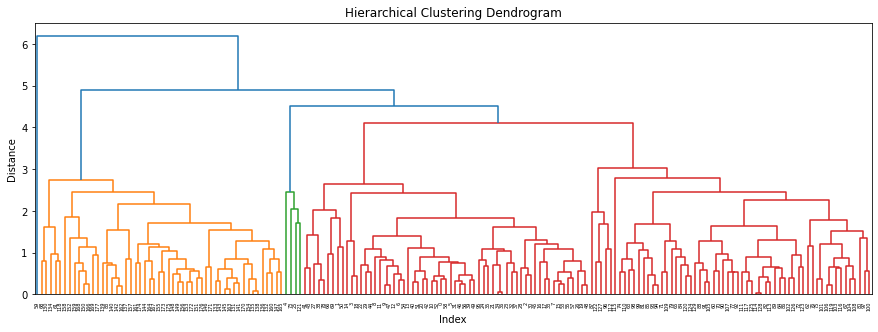

In [27]:
z = linkage(wine_data_pca, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

#### Here we can see that there are 5 no . of clusters.

#### Step-5.1.2 : Buliding the Clustering model

#### Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [28]:
for nc in range(2,7):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='average',affinity = "euclidean").fit(wine_data_pca)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr= sklearn.metrics.silhouette_score(wine_data_pca, cluster_labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.36310673051041453
For n_clusters = 3 The average silhouette_score is : 0.38672545200747727
For n_clusters = 4 The average silhouette_score is : 0.32173131311197756
For n_clusters = 5 The average silhouette_score is : 0.4465449278023582
For n_clusters = 6 The average silhouette_score is : 0.39074628143794904


#### Model with 5 no. of clusters has the highest accuracy. Hence build the model with 5 no. of clusters.

In [29]:
h_cluster = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(wine_data_pca) 
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels
wine_data['clust']=cluster_labels
wine_data  

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


#### Step-5.1.3 : Analysing the results obtained from the model

In [30]:
wine_data.groupby(wine_data.clust).mean()   

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,12.215833,1.971000,2.265167,20.498333,91.083333,2.247667,2.084500,0.361167,1.619833,2.943000,1.059100,2.831833,498.683333
1,13.684754,1.945902,2.399836,16.800000,107.524590,2.809344,2.937213,0.283934,1.953115,5.449508,1.067377,3.137213,1101.131148
2,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923
3,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
4,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000


#### We can see that 5 no. of clusters are formed.

#### Following are the different wine samples in each type of wine

In [31]:
array = np.sort(wine_data["clust"].unique())
list = array.tolist()
for i in list:
    d_cluster_n = wine_data[(wine_data.clust==i)]
    print("\nThe following are the different types of wine in Cluster-'"+str(i)+"'\n\n",d_cluster_n)


The following are the different types of wine in Cluster-'0'

      Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
60     12.33   1.10  2.28        16.0        101     2.05        1.09   
62     13.67   1.25  1.92        18.0         94     2.10        1.79   
63     12.37   1.13  2.16        19.0         87     3.50        3.10   
64     12.17   1.45  2.53        19.0        104     1.89        1.75   
65     12.37   1.21  2.56        18.1         98     2.42        2.65   
67     12.37   1.17  1.92        19.6         78     2.11        2.00   
70     12.29   1.61  2.21        20.4        103     1.10        1.02   
71     13.86   1.51  2.67        25.0         86     2.95        2.86   
72     13.49   1.66  2.24        24.0         87     1.88        1.84   
74     11.96   1.09  2.30        21.0        101     3.38        2.14   
75     11.66   1.88  1.92        16.0         97     1.61        1.57   
76     13.03   0.90  1.71        16.0         86     1.95   

<Figure size 960x480 with 0 Axes>

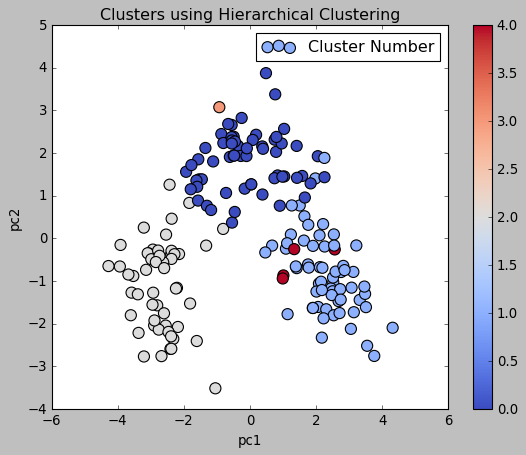

In [32]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
wine_data_pca.plot(x="pc1",y ="pc2",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 
plt.show()

#### We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

#### Evaluating accuracy of the model using Silhouette score

In [33]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_hc = sklearn.metrics.silhouette_score(wine_data_pca, cluster_labels)
slht_scr_hc

0.4465449278023582

#### The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

### Step-5.2 : Using K-means Clustering model

#### Step-5.2.1 : Determing no. of clusters using 'Elbow method'

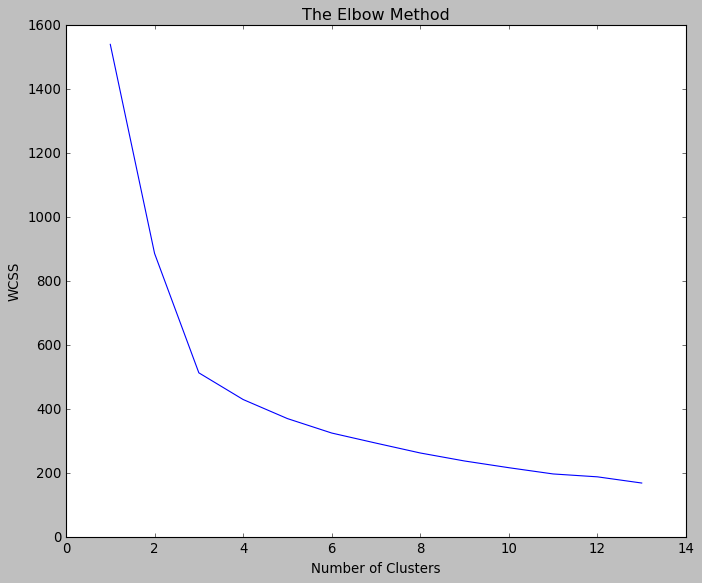

In [34]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 14):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(wine_data_pca)
    WCSS.append(k_cluster.inertia_)
plt.plot(range(1, 14), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')

plt.show()  

#### Therefore from the elbow curve, we can observe that the number of clusters are 5.

#### Step-5.2.2 : Buliding the Clustering model

#### Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [35]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
for nc in range(2,14):
    k1_cluster = KMeans(n_clusters=nc, random_state=0)
    y1_kmeans = k1_cluster.fit_predict(wine_data_pca)
    slht_scr= sklearn.metrics.silhouette_score(wine_data_pca, y1_kmeans)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.38938813089003266
For n_clusters = 3 The average silhouette_score is : 0.453235121568395
For n_clusters = 4 The average silhouette_score is : 0.4071965994633163
For n_clusters = 5 The average silhouette_score is : 0.3819264948812631
For n_clusters = 6 The average silhouette_score is : 0.3189496710596297
For n_clusters = 7 The average silhouette_score is : 0.3031271739716028
For n_clusters = 8 The average silhouette_score is : 0.2976152819938032
For n_clusters = 9 The average silhouette_score is : 0.28998198250936874
For n_clusters = 10 The average silhouette_score is : 0.29941446103697933
For n_clusters = 11 The average silhouette_score is : 0.30415873466787274
For n_clusters = 12 The average silhouette_score is : 0.3066235041825381
For n_clusters = 13 The average silhouette_score is : 0.31253232542990667


#### Model with 3 no. of clusters has the highest accuracy. Hence build the model with 3 no. of clusters.

In [36]:
k_cluster = KMeans(n_clusters=3)
y_kmeans = k_cluster.fit_predict(wine_data_pca)  

In [37]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [38]:
k_cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [39]:
k_cluster.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01]])

In [40]:
# Within cluster sum of squares or variance
k_cluster.inertia_

513.0564645910773

In [41]:
ks = pd.Series(y_kmeans) 
wine_data['clust']=ks
wine_data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


#### Step-5.2.3 : Analysing the results obtained from the model

In [42]:
wine_data.groupby(wine_data.clust).mean()   

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


#### Following are the different wine samples in each type of wine

In [43]:
k_cluster_0 = wine_data[(wine_data.clust==0)]
k_cluster_0   

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.98,1.59,450,0
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.84,2.01,515,0
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.400000,0.70,2.12,372,0
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,0
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,0
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,0
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,0
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,0
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,0
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,0


In [44]:
k_cluster_1 = wine_data[(wine_data.clust==1)]
k_cluster_1   

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270,1
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,1
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,1
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,1


In [45]:
k_cluster_2 = wine_data[(wine_data.clust==2)]
k_cluster_2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,2
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,2
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,2
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,2
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,2


<Figure size 960x480 with 0 Axes>

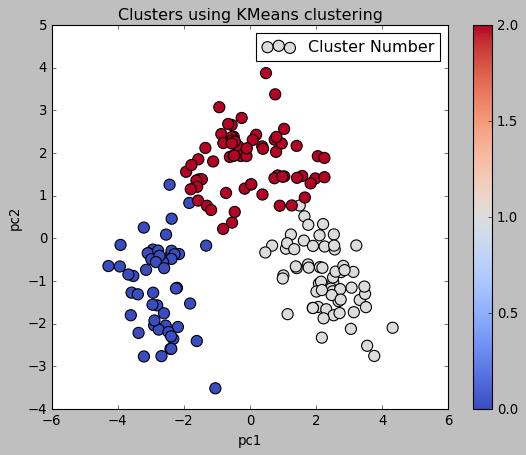

In [46]:
plt.style.use(['classic']) 
plt.figure(figsize=(12,6))
wine_data_pca.plot(x="pc1",y ="pc2",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
plt.show()

#### We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

#### Evaluating accuracy of the model using Silhouette score

In [47]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_kc = sklearn.metrics.silhouette_score(wine_data_pca, k_cluster.labels_) 
slht_scr_kc

0.4537999848257615

### Step-6 : Comparing the models using Silhouette score

In [48]:
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hc)
print("The Silhouette score of KMeans Clustering:",slht_scr_kc)

The Silhouette score of Hierarchical Clustering: 0.4465449278023582
The Silhouette score of KMeans Clustering: 0.4537999848257615


#### Here we can see that the Silhouette score for K-means clustering is more than the other model.

### Step-7 : Conclusion

#### Hence the KMeans clustering model can be selected to classify the dataset and the no. of clusters = 3 matched with the original classification.

In [49]:
wine_data_ognl = pd.read_csv("wine.csv")

In [50]:
# Creating original dataset with PCA values and Type (Initial Classification)
wine_data_ognl = pd.concat([wine_data_pca,wine_data_ognl["Type"]],axis=1)
wine_data_ognl

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [51]:
cls_count_ognl=wine_data_ognl["Type"].value_counts().rename_axis('Type').reset_index(name='Counts')
cls_count_ognl

,Type,Counts
0,2,71
1,1,59
2,3,48


In [52]:
cls_count_kc=wine_data["clust"].value_counts().rename_axis('Cluster').reset_index(name='Counts')
cls_count_kc

,Cluster,Counts
0,2,65
1,1,62
2,0,51


#### Calculate percentage of error in each cluster

In [53]:
np.round(abs(cls_count_ognl['Counts']-cls_count_kc['Counts'])/cls_count_ognl["Counts"]*100,2)

0    8.45
1    5.08
2    6.25
Name: Counts, dtype: float64

#### Therefore the percentage of error is very less. Hence the clustering model is able to classify the data correctly and there is not much deviation from the original classification given.

#### A Visualisation comparing both KMeans Clustered Dataset  and Original Classsification Dataset

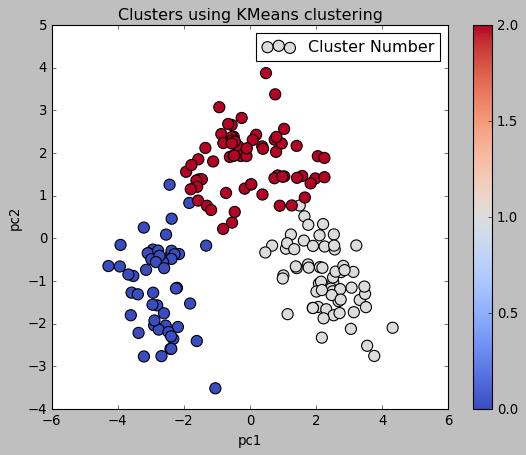

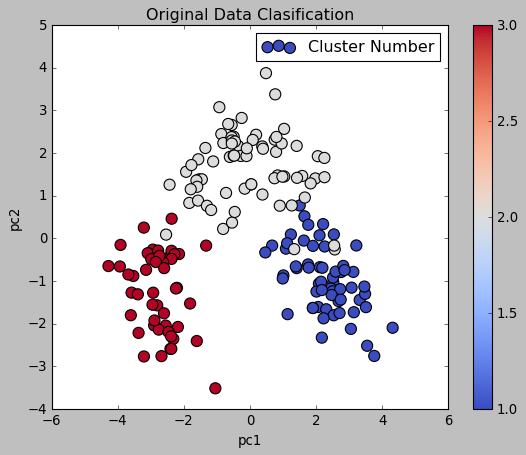

In [54]:
wine_data_pca.plot(x="pc1",y ="pc2",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans clustering')
wine_data_ognl.plot(x="pc1",y ="pc2",c=wine_data_ognl["Type"],label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Original Data Clasification')
plt.show()